# Explorative narrative for Owl2v task


Due to the issue concerning loading multiple images, we still want to know how well is our object detection 'pipeline' applicable on a wider scale. That is why we consider several different cases in regards to their metrics:

- Overall detection accuracy of Owl2v model
- Ground Truth and Predicted labels
- Ground Truth and Predicted box coordinates
- IoU and F1 Scores


Threshold for IoU = 0.3

Threshold for object detection = 0.35

### The perfect case

In [27]:
GT1 = {
    'highway_3554_2020-08-26.jpg': [
        ('car', 474.0, 729.0, 588.0, 958.5),
        ('car', 589.5, 640.5, 720.0, 870.0),
        ('car', 372.0, 253.5, 427.5, 339.0)
    ]
}

Predicted1 = {
    'highway_3554_2020-08-26.jpg': [
        ('car', 473.37, 728.53, 596.3, 955.09),
        ('car', 593.12, 648.8, 735.17, 893.16),
        ('car', 377.39, 262.71, 422.43, 337.44),
        ('car', 294.12, 104.09, 309.04, 123.68)
    ]
}

IoU = {
    0.913327,
    0.768084,
    0.713409
}

F1 = 0.86

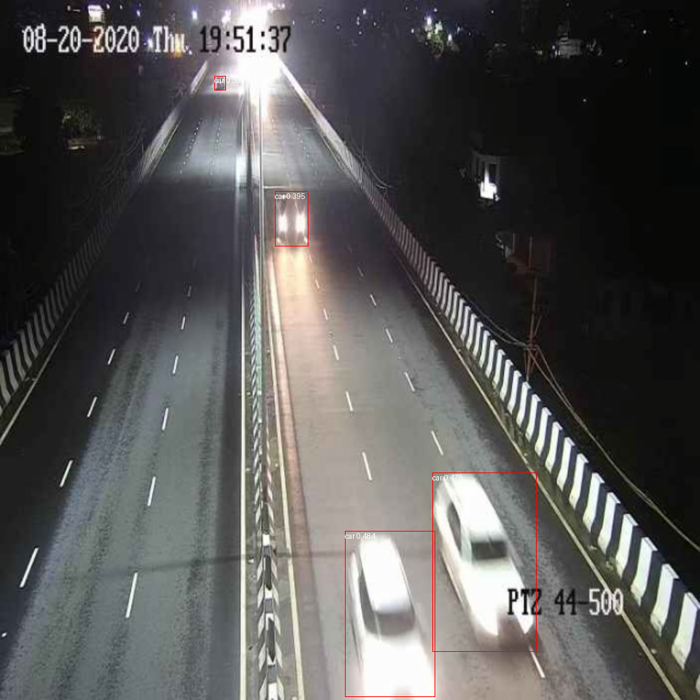

In [24]:
from PIL import Image 
im1 = Image.open(r"/Users/a788/Desktop/BPTI/images/1.png")
size = (700, 700)
display(im1.resize(new_size))

It can be seen that in the case of an image which has a relatively small (3) ground truth object count, the model predicts boxes at significant accuracy.

### Label discrepancies

In [30]:
GT1 = {'ulu2542_jpg.rf.d46dd7f3971dd06bc52eb6cd29661896.jpg': 
       [('car', 456.923, 456.923,537.693, 673.846),
        ('car', 168.462, 341.538, 263.077, 461.538)]}

Predicted1 = {'ulu2542_jpg.rf.d46dd7f3971dd06bc52eb6cd29661896.jpg': 
         [('truck', 454.16, 470.9, 535.45, 671.89),
          ('lcv', 160.69, 343.37, 259.02, 471.43),
          ('motorcycle', 197.63, 218.22, 226.7, 251.93),
          ('motorcycle', 85.97, 178.36, 103.72, 211.21)]}

IoU = {
    0.874086,
    0.809516,
    "NaN",
    "Nan"
}

F1 = 0

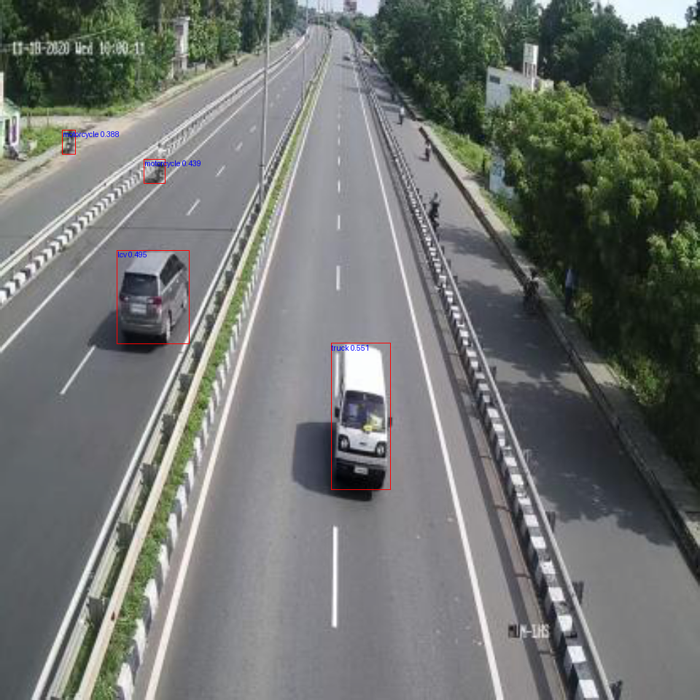

In [33]:
im2 = Image.open(r"/Users/a788/Desktop/BPTI/images/2.png")
size = (700, 700)
display(im2.resize(new_size))

Although the model predicts label coordinates accurately (IoU score), low F1 score is determined by wrong label detection. 

In addition, an occuring pattern emerges: in the first picture and in this case, the model detects objects more accurately than noted in the ground truth labels even with a relatively high treshold score for outputs.

### Covered Object | Importance of choosing a threshold

In [34]:
GT1 = {'Highway_146_2020-07-30_jpg.rf.b7146a9f23005279adcf91189cbd91f5.jpg': 
       [('car',499.2,453.6,595.2,619.2),
      ('car', 544.8, 732.0, 648.0, 902.4),
      ('motorcycle', 660.0, 760.8, 720.0, 914.4)]}

Predicted1 ={'Highway_146_2020-07-30_jpg.rf.b7146a9f23005279adcf91189cbd91f5.jpg': 
             [('truck',562.34,742.04,711.49,956.06),
              ('truck', 41.73, 740.42, 714.06, 955.92),
              ('truck', 508.07, 467.12, 567.29, 607.03),
              ('truck', 730.57, 414.93, 781.68, 502.36)]}

IoU = {
    0.00,
    0.12,
    0.00,
    "Nan"
}

F1 = 0

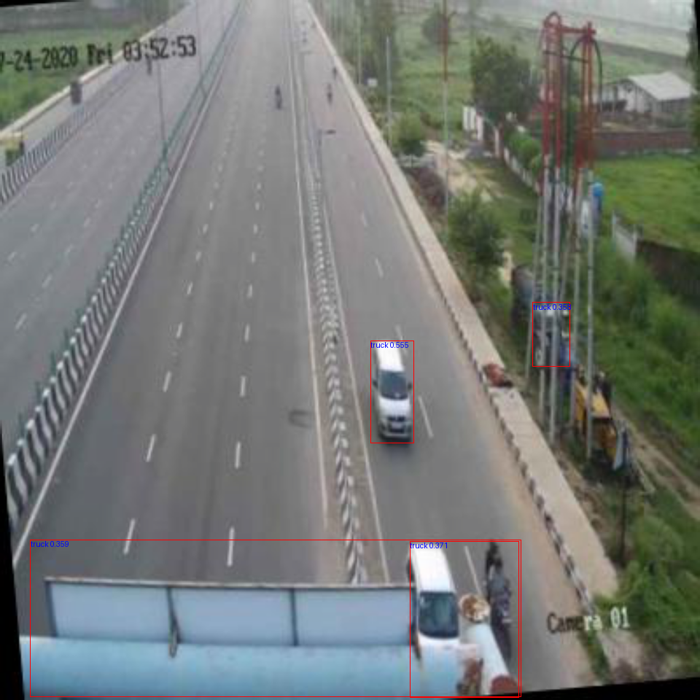

In [35]:
im3 = Image.open(r"/Users/a788/Desktop/BPTI/images/3.png")
size = (700, 700)
display(im3.resize(new_size))

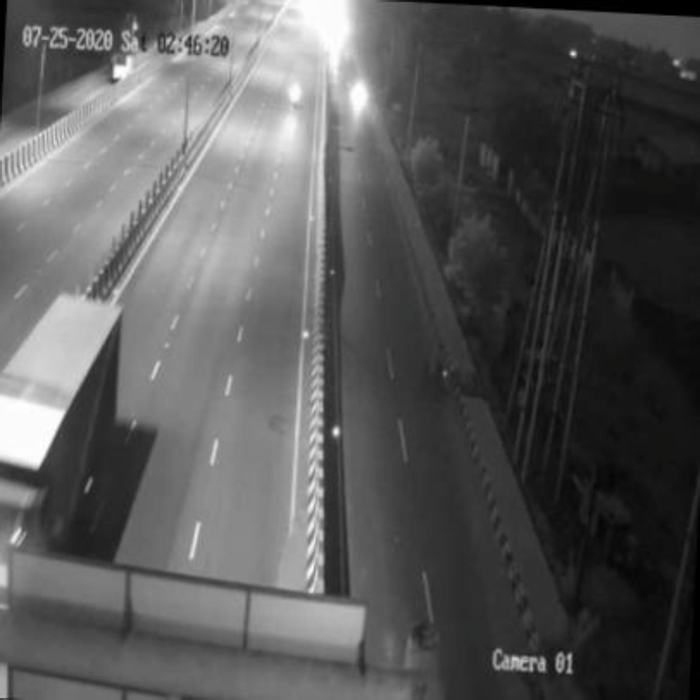

In [44]:
im33 = Image.open(r"/Users/a788/Desktop/BPTI/images/3,3.png")
size = (700, 700)
display(im33.resize(new_size))

Notable issue here is the covering of objects (street signs, other car) and empty space in the highway what causes misses in the object detection. 

Increasing threshold by 0.01 makes a things slightly better.

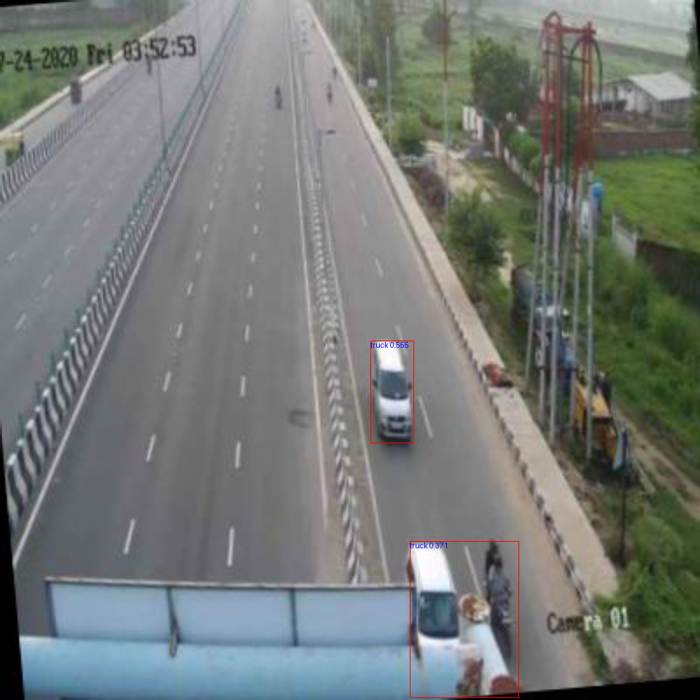

In [41]:
im32 = Image.open(r"/Users/a788/Desktop/BPTI/images/3,2.png")
size = (700, 700)
display(im32.resize(new_size))

### Accuracy of the model

In [40]:
GT1 = {'Highway_1261_2020-07-30_jpg.rf.39ff0e3ad5bad698e0f7e8aea0a44855.jpg': 
       [('car',272.308,253.846,339.231,366.923),
      ('motorcycle', 357.692, 246.923, 394.616, 316.153),
      ('motorcycle', 459.23, 297.693, 493.846, 369.231),
      ('motorcycle', 493.846, 302.307, 523.846, 378.461)]}

Predicted1 = {'Highway_1261_2020-07-30_jpg.rf.39ff0e3ad5bad698e0f7e8aea0a44855.jpg': 
              [('motorcycle', 469.87, 327.34, 485.94,365.97),
              ('motorcycle', 495.98, 315.29, 514.57, 365.35),
              ('motorcycle', 366.44, 275.29, 379.66, 305.89),
              ('truck', 286.47, 262.83, 329.59, 364.5),
              ('motorcycle', 68.51, 291.83, 86.43, 328.47),
              ('motorcycle', 365.9, 271.66, 379.79, 302.51),
              ('motorcycle', 3.76, 213.27, 18.82, 242.92),
              ('motorcycle', 178.08, 145.36, 191.51, 170.16),
              ('motorcycle', 444.81, 139.29, 457.12, 162.58),
              ('car', 423.4, 109.26, 443.14, 137.0),
              ('car', 341.95, 46.54, 356.03, 70.44),
              ('car', 364.62, 16.66, 378.74, 36.58)]}

IoU = {
    0.00,
    0.00,
    0.00,
    "Nan"
    "Nan",
    "Nan",
}

F1 = 0

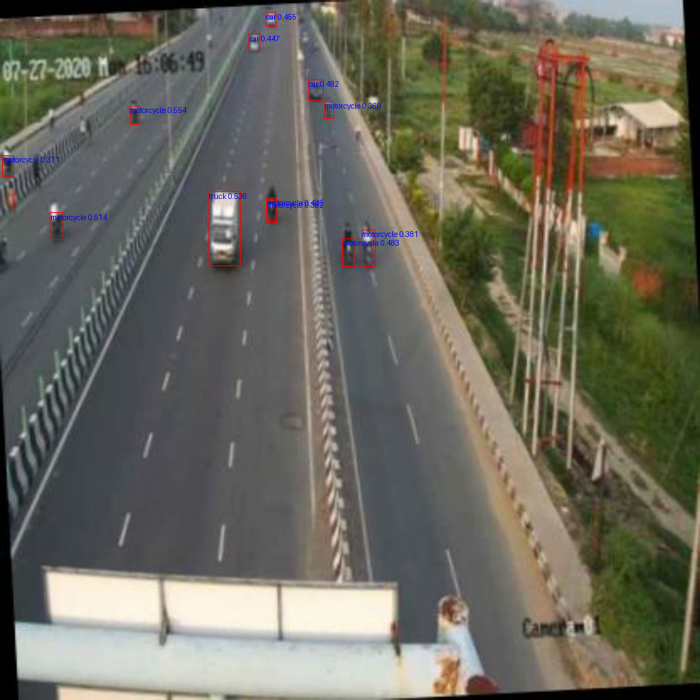

In [42]:
im4 = Image.open(r"/Users/a788/Desktop/BPTI/images/4.png")
size = (700, 700)
display(im4.resize(new_size))

Example of how accurate (in the sense that identifies 4 times more than GT labels) the model is. 

Nevertheless, the object detections are not always that precise. 

This case shows that the assumption on reversing order and matching prediction and GT based on order is not always true (especially in the case of higher quantity of objects).

### Conclusion

- Assumption on matching by order works only on images were there are relatively small number of objects
- Fine-tuning for label precision is needed -> solving issue of loading several images
- Deeper analysis: confusion matrix, multiple-object detection IoU visualizations